In [7]:
# 2. 비지도 학습
# 2-1 K-평균 군집화
# 라이브러리 호출
import pandas as pd # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.cluster import KMeans # type: ignore
import matplotlib.pyplot as plt # type: ignore

# 상품에 대한 연 지출 데이터 호출
data = pd.read_csv('./data/sales data.csv')
data.head()     # 도매 유통업체 고객 데이터

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
# 연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detegents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)     # 명목형 데이터를 pandas.get_dummies() -> 가변수(0 혹은 1)로 만듦
    data = pd.concat([data, dummies], axis=1)       # pandas.concat() - 컬럼 병합
    data.drop(col, axis=1, inplace=True)    # 데이터를 넘기지 않아도 데이터 내에서 값 자체를 처리   *파이썬이 참조형 프로그램이기 때문, R과의 차이점
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [9]:
# 데이터 스케일링(전처리) - 연속형 데이터의 모든 특성에 동일하게 중요성을 부여
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

data_transformed[0:5]               # *표준편차 : '데이터가 평균으로부터 얼마나 퍼져 있는가', '개별 데이터 포인트들이 평균 값에서 얼마나 떨어져 있는지'

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.11825445, 0.01553586, 0.04546385, 0.10484189, 0.01234568,
        0.03723404, 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.20162642, 0.07291369, 0.07755155, 0.063934  , 0.04345483,
        0.10809345, 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

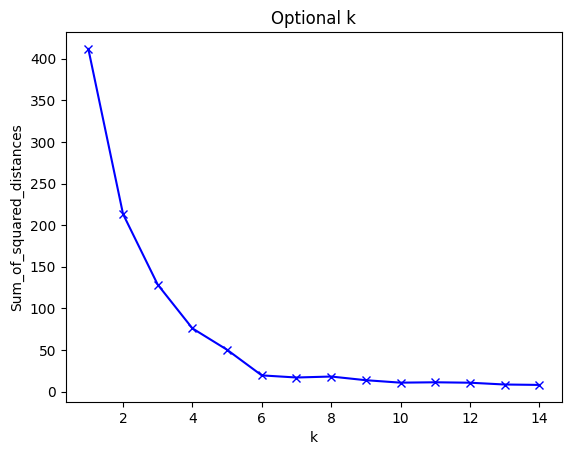

In [10]:
# 적당한 K 값 추출
Sum_of_squared_distances = []
# Sum of Squared Distance(SSD)
#   거리기반 알고리즘(클러스터링 등)에서 사용됩니다.
#   각 데이터 포인트와 특정 기준점(예: 클러스터 중심) 사이의 거리를 제곱하고 합산합니다.
#   주로 클러스터링 알고리즘에서, 클러스터의 응집도를 측정하는 데 사용됩니다.
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optional k')
plt.show()      # K=6 이후로는 값에 큰 차이가 없음, K=5 => 그룹을 5개로 군집화하는 것이 가장 적절함

In [1]:
# 2-2 밀도 기반 군집 분석(Density-Based Spatial Clustering of Applications with Noise, DBSCAN)

from sklearn.datasets import make_moons     # type: ignore # 달 모양의 데이터를 만드는 데이터셋
from sklearn.cluster import DBSCAN # type: ignore
import matplotlib.pyplot as plt # type: ignore

X, y = make_moons(n_samples=1000, noise=0.05)      # 일부러 noise를 생성        *노이즈 설명 - https://www.ktpdigitallife.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%85%B8%EC%9D%B4%EC%A6%88-%EB%9C%BB%EA%B3%BC-%EA%B0%9C%EB%85%90-%EC%84%A4%EB%AA%85/

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

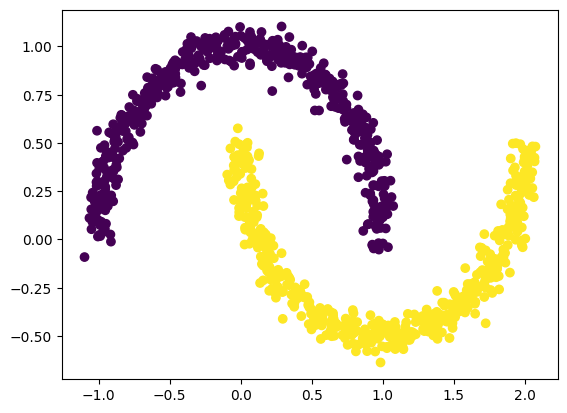

In [2]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.show()

In [3]:
# 2-3 주성분 분석(Principal Component Analysis, PCA)
# 라이브러리 호출
# 데이터 처리 라이브러리
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
# 데이터 분석 - 머신러닝 라이브러리
from sklearn.cluster import DBSCAN # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.preprocessing import normalize # type: ignore
from sklearn.decomposition import PCA # type: ignore

# 데이터 로딩
X = pd.read_csv('./data/credit card.csv')
X = X.drop('CUST_ID', axis=1)       # CUST_ID 컬럼(열) 삭제
# 결측치 작업   *https://wikidocs.net/153209
# X.fillna(method='ffill', inplace=True)      * method='ffill' : 결측치가 존재한다면 이전 값으로 채움
X.ffill(inplace=True)       # obj.fillna(method='ffill') -> obj.ffill()
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
# 데이터 전처리 작업 및 차원 축소 진행(스케일링)
scaler = StandardScaler()       # 평군 0, 표준편차 1로 데이터 크기를 조정
X_scaler = scaler.fit_transform(X)

X_normalized = normalize(X_scaler)      # 가우스 분포를 따르도록 데이터 정규화
X_normalized = pd.DataFrame(X_normalized)       # numpy 배열을 데이터프레임으로 변환

X_normalized.head()

# 차원 축소
pca = PCA(n_components=2)       # 2차원으로 차원 축소
X_principal = pca.fit_transform(X_normalized)       # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
# 확인
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506


In [56]:
# DBSCAN 모델 생성 및 결과 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)     # 밀도 기반 클러스터링 모델 생성 및 훈련
labels = db_default.labels_     # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장
set(labels)     # {np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)       # 정의된 색상 벡터에 따라서 x축 P1, y축 P2

plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

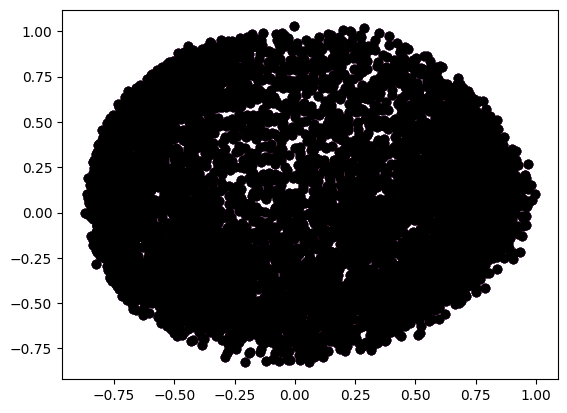

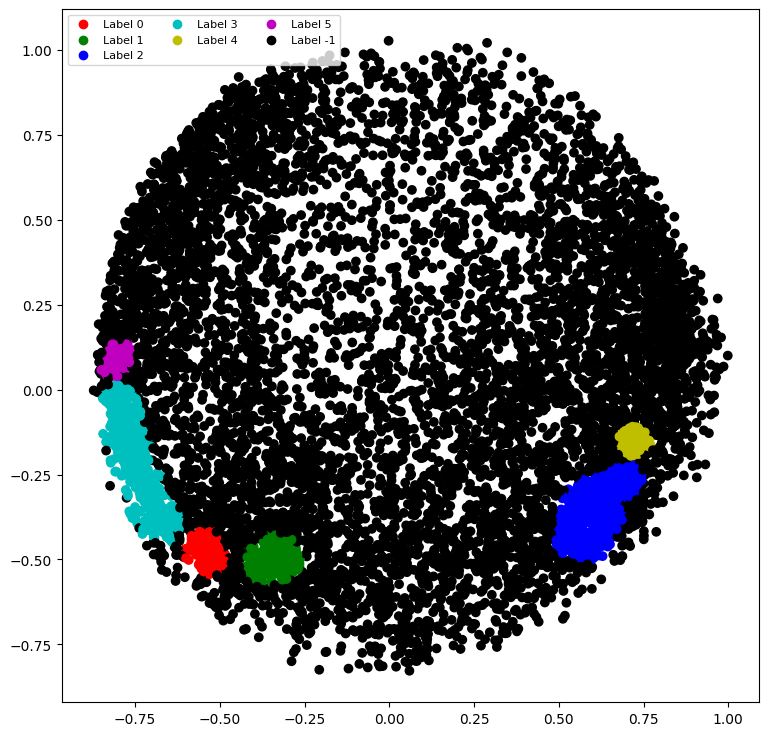

In [40]:
# 모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels = db.labels_

colours1 = {}
colours1[0]='r'
colours1[1]='g'
colours1[2]='b'
colours1[3]='c'
colours1[4]='y'
colours1[5]='m'
colours1[-1]='k'

cvec = [colours1[label] for label in labels]
colors1=['r','g','b','c','y','m','k']

r = plt.scatter(X_principal['P1'], X_principal['P 2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)       # 정의된 색상 벡터에 따라서 x축 P1, y축 P2

plt.legend(
            (r,g,b,c,y,m,k), 
            ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
            scatterpoints=1, 
            loc='upper left', 
            ncol=3, 
            fontsize=8)
plt.show()